<a href="https://colab.research.google.com/github/ddlcz/mit-datasci-program/blob/main/Case_Study_PCA_and_TSNE_MLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Air Pollution Data Exploration**

-----------------------------
## **Context**
-----------------------------

Air pollution is all around us. Indoors, outdoors, in cities, and in the countryside. It affects us all, whether we realize it or not. The rise in permissible concentrations of various pollutants observed over the last few decades contributes to rising pollution levels. As a result, affecting the weather conditions in an unfavorable manner and the formation of smog phenomena. In fact, the affected air quality level in the atmosphere has a negative impact on individual health and may cause an economic imbalance. Diseases caused by rising pollution levels are one of the major issues confronting urban settlements.

In this case study, we will explore and visualize the Air Pollution dataset, which contains information about air molecules and pollutants found in the air.

-----------------------------
## **Objective**
-----------------------------

The objective of this problem is to reduce the number of features by using dimensionality reduction techniques such as PCA and t-SNE, and extract insights about the data.

-----------------------------
## **Dataset**
-----------------------------
- This dataset contains about **13 months of data on major pollutants and meteorological levels of a city**.

- The data shows average readings for Nitric Oxide(NO), Nitrogen Dioxide(NO2), Oxides of Nitrogen, Ozone, Particulate Matter (PM10 and PM2.5), Sulphur Dioxide, Benzene, Toulene, and P_Xylene. Measured in Micrograms per Cubic Meter of Air (ug/m3). Also shows few generic features WindSpeed, VerticalWindSpeed, BarPressure, Weather,Temp, and WindDirection.

- The PD denotes the Previous Day. In this dataset, we have 5 columns that are Previous Date values of correponsing columns in the dataset. They are PD_PM10, PD_NO2, PD_SO2, PD_CO, PD_PM2.5.

- The **Date** is the feature at which the data was recorded.

## **Importing libraries and overview of the dataset**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
#uses mean and standard dev of 1
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_air_pol = pd.read_csv('/content/drive/MyDrive/DataSci/Week 4 - Data Analysis/MLS1 - Data Exploration & Networks/Delhi+Air+Pollution+Case+Study-Dataset.csv')

**Let's get an overview of the data and prepare it for visualization**

In [ ]:
# Loading the data
#data_air_pol = pd.read_csv("AirPollution.csv")

In [ ]:
data_air_pol

,SrNo,Date,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,1,04-04-2015,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,2,05-04-2015,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,3,09-04-2015,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,...,1.55,-0.17,146.94,728.08,Summer,NaN,NaN,NaN,NaN,NaN
3,4,10-04-2015,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,5,11-04-2015,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,399,27-05-2016,48.15,0.91,72.45,87.46,18.91,287.42,2.71,9.76,...,1.60,-0.15,138.25,733.96,Summer,161.62,438.37,68.71,18.91,0.91
399,400,28-05-2016,14.21,0.81,46.07,46.74,24.12,157.15,1.75,0.00,...,2.15,-0.24,143.11,733.51,Summer,287.42,596.41,72.45,18.91,0.91
400,401,29-05-2016,1.64,0.63,32.67,120.28,14.09,63.49,0.99,0.00,...,2.99,0.01,176.09,733.83,Summer,157.15,434.31,46.07,24.12,0.81
401,402,30-05-2016,34.38,1.27,61.31,41.64,18.18,58.36,2.21,7.73,...,1.33,-0.09,87.97,734.55,Summer,63.49,216.53,32.67,14.09,0.63


**Checking the info of the data**

In [ ]:
data_air_pol.info()
#missing data
#need to drop SrNo
#need to convert strings to numeric variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SrNo               403 non-null    int64  
 1   Date               403 non-null    object 
 2   NO                 401 non-null    float64
 3   CO                 402 non-null    float64
 4   NO2                401 non-null    float64
 5   O3                 397 non-null    float64
 6   SO2                399 non-null    float64
 7   PM2.5              401 non-null    float64
 8   Benzene            402 non-null    float64
 9   Toulene            402 non-null    float64
 10  P_Xylene           372 non-null    float64
 11  NOx                401 non-null    float64
 12  PM10               401 non-null    float64
 13  WindDirection      402 non-null    float64
 14  NH3                401 non-null    float64
 15  RH                 402 non-null    float64
 16  Temp               401 non

**Observations:**

- There are **403 observations and 27 columns** in the data.
- **All the columns except Date and Weather are of numeric data type**.
- Weather is of object data type. We can create **dummy variables** for each category and convert it to numeric data type.
- The majority of the **columns have some missing values**.
- Let's **check the number of missing values** in each column.

In [ ]:
data_air_pol.isnull()#.sum()

,SrNo,Date,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
399,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
400,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
401,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Observations:**

- All the columns except SrNo and Date have missing values.
- We will impute (fill in) these missing values by using the mode for the categorical variables, the median for the skewed numerical variables, and the mean for the non-skewed numerical variables.

## **Data Preprocessing and Exploratory Data Analysis**

In [ ]:
# Dropping the columns - SrNo and Date
data_air_pol.drop(columns = ["SrNo", "Date"], inplace = True)

### **Summary Statistics**

In [ ]:
data_air_pol

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,3.43,65.53,...,1.55,-0.17,146.94,728.08,Summer,NaN,NaN,NaN,NaN,NaN
3,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,4.66,68.83,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,7.66,67.40,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,48.15,0.91,72.45,87.46,18.91,287.42,2.71,9.76,4.69,130.06,...,1.60,-0.15,138.25,733.96,Summer,161.62,438.37,68.71,18.91,0.91
399,14.21,0.81,46.07,46.74,24.12,157.15,1.75,0.00,2.01,60.46,...,2.15,-0.24,143.11,733.51,Summer,287.42,596.41,72.45,18.91,0.91
400,1.64,0.63,32.67,120.28,14.09,63.49,0.99,0.00,0.81,31.32,...,2.99,0.01,176.09,733.83,Summer,157.15,434.31,46.07,24.12,0.81
401,34.38,1.27,61.31,41.64,18.18,58.36,2.21,7.73,3.40,101.07,...,1.33,-0.09,87.97,734.55,Summer,63.49,216.53,32.67,14.09,0.63


In [ ]:
data_air_pol.describe()#.T
#50% = median

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,Temp,WindSpeed,VerticalWindSpeed,Solar,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
count,401.000000,402.000000,401.000000,397.000000,399.000000,401.000000,402.000000,402.000000,372.000000,401.000000,...,401.000000,402.000000,401.000000,401.000000,401.000000,393.000000,392.000000,391.000000,390.000000,392.000000
mean,81.323292,2.210000,74.433791,56.298917,25.988496,130.160673,6.525945,17.192488,8.128844,194.681222,...,24.425686,1.238035,0.188853,112.954813,732.560698,130.505445,265.622551,74.319003,25.964949,2.200765
std,97.204368,1.601589,25.862319,29.690436,25.273204,84.196954,3.983177,10.410131,6.733961,141.121196,...,7.419778,0.556081,0.785720,37.465048,1.799439,84.786348,135.526761,25.996784,25.417022,1.602474
min,1.120000,0.220000,25.270000,4.980000,0.000000,18.750000,0.160000,0.000000,0.300000,26.490000,...,6.560000,0.300000,-2.870000,3.310000,721.670000,18.750000,36.630000,25.270000,0.000000,0.370000
25%,11.380000,1.202500,54.500000,30.120000,9.515000,68.110000,3.235000,9.695000,3.382500,87.670000,...,18.820000,0.852500,-0.170000,84.900000,731.690000,68.050000,163.380000,54.030000,9.412500,1.207500
50%,39.220000,1.780000,73.680000,53.210000,21.680000,108.240000,5.910000,16.240000,6.060000,152.310000,...,26.570000,1.160000,-0.050000,121.850000,733.380000,108.240000,250.105000,73.520000,21.605000,1.775000
75%,118.030000,2.737500,91.430000,76.850000,37.145000,166.160000,8.940000,22.972500,10.570000,264.380000,...,29.860000,1.520000,0.400000,141.030000,733.760000,170.990000,357.955000,91.370000,37.197500,2.667500
max,480.900000,19.900000,149.010000,159.700000,371.750000,550.230000,17.510000,48.410000,32.350000,743.700000,...,41.050000,3.450000,3.560000,345.680000,736.080000,550.230000,705.700000,149.010000,371.750000,19.900000


In [ ]:
data_air_pol.select_dtypes(include = 'object')

,Weather
0,Summer
1,Summer
2,Summer
3,Summer
4,Summer
...,...
398,Summer
399,Summer
400,Summer
401,Summer


In [ ]:
#data_air_pol.select_dtypes(include = [int,float])
result = data_air_pol.select_dtypes(include = 'number')
result

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,Temp,WindSpeed,VerticalWindSpeed,Solar,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,...,20.24,1.22,0.08,162.18,732.25,NaN,NaN,NaN,NaN,NaN
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,...,16.93,0.62,-0.04,99.37,734.05,48.99,82.85,47.94,16.88,1.77
2,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,3.43,65.53,...,26.59,1.55,-0.17,146.94,728.08,NaN,NaN,NaN,NaN,NaN
3,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,4.66,68.83,...,25.21,1.18,-0.15,150.07,730.47,46.93,171.36,59.86,13.11,0.50
4,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,7.66,67.40,...,26.52,0.88,0.15,137.01,730.62,112.95,232.22,63.56,16.19,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,48.15,0.91,72.45,87.46,18.91,287.42,2.71,9.76,4.69,130.06,...,34.52,1.60,-0.15,138.25,733.96,161.62,438.37,68.71,18.91,0.91
399,14.21,0.81,46.07,46.74,24.12,157.15,1.75,0.00,2.01,60.46,...,33.95,2.15,-0.24,143.11,733.51,287.42,596.41,72.45,18.91,0.91
400,1.64,0.63,32.67,120.28,14.09,63.49,0.99,0.00,0.81,31.32,...,29.90,2.99,0.01,176.09,733.83,157.15,434.31,46.07,24.12,0.81
401,34.38,1.27,61.31,41.64,18.18,58.36,2.21,7.73,3.40,101.07,...,23.90,1.33,-0.09,87.97,734.55,63.49,216.53,32.67,14.09,0.63


In [ ]:
cont_cols = list(result)
cont_cols

['NO',
 'CO',
 'NO2',
 'O3',
 'SO2',
 'PM2.5',
 'Benzene',
 'Toulene',
 'P_Xylene',
 'NOx',
 'PM10',
 'WindDirection',
 'NH3',
 'RH',
 'Temp',
 'WindSpeed',
 'VerticalWindSpeed',
 'Solar',
 'BarPressure',
 'PD_PM2.5',
 'PD_PM10',
 'PD_NO2',
 'PD_SO2',
 'PD_CO']

**Observations:**

- The normal level of PM10 is about 100 micrograms per cubic meter and for PM2.5 level, it is about 60 micrograms per cubic meter. Here, we can infer that PM10 has a high median of ~ 250, and PM2.5 has a median of 108, which are harmful to the environment and people.
- The higher level of different types of particulate matter indicates that the data might belong to an urban or industrial area.  
- The concentration of nitrogen oxide (NO) in the air should be in a range of 60-80 µg/m3. The mean of nitrogen oxide is 74.4, which is in the given range ensuring less impact.
- The standard deviation is very high for the variables - NO, NOx, PM10, and PM2.5, which indicates that the pollution varies highly in a year (as the data is for 13 months).
- The maximum value of many features reaches an alarming high level, indicating there might be outliers in the data.

**Let's check the distribution and outliers for numerical columns in the data**

NO
Skew : 1.65


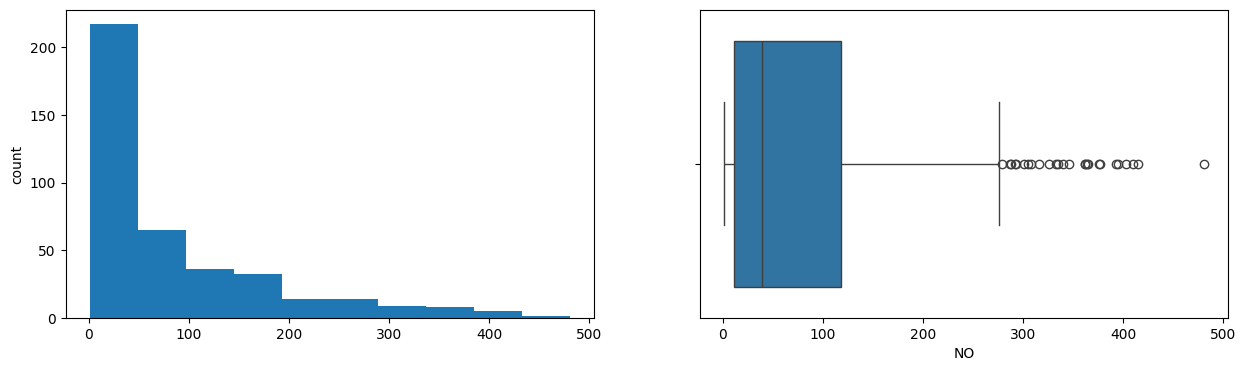

CO
Skew : 4.16


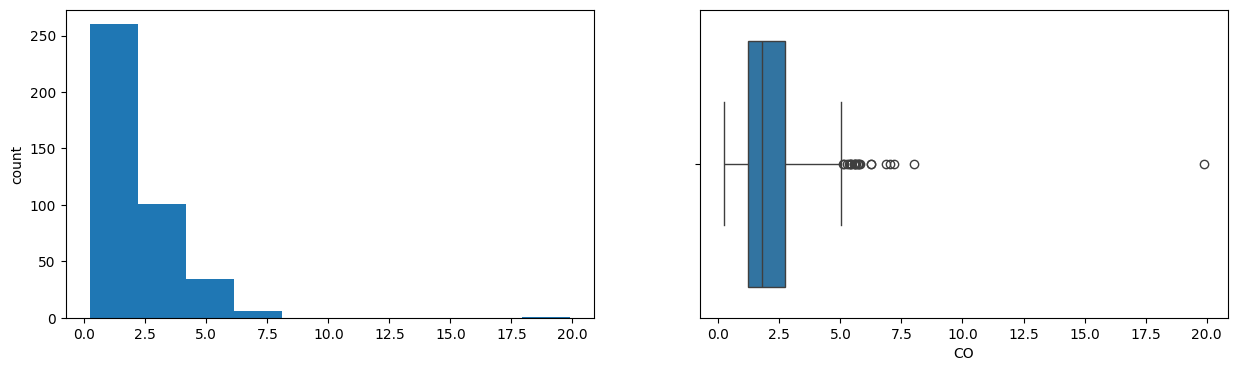

NO2
Skew : 0.35


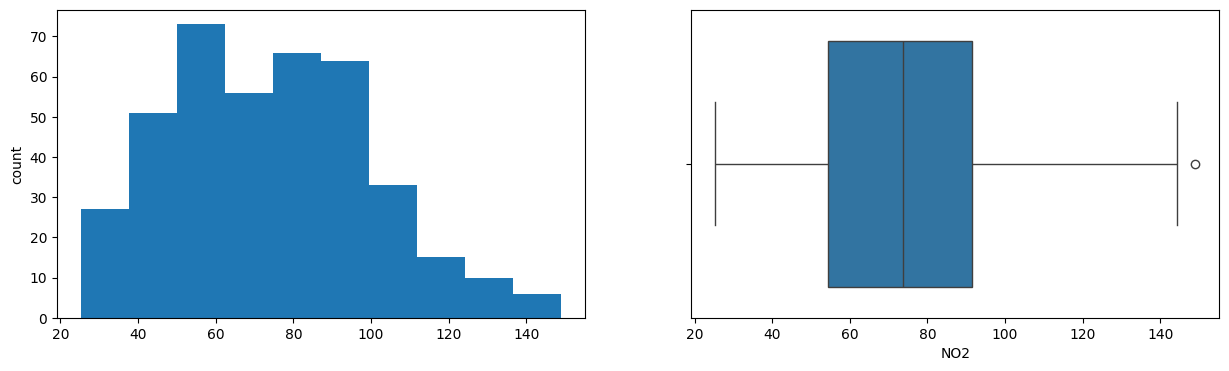

O3
Skew : 0.53


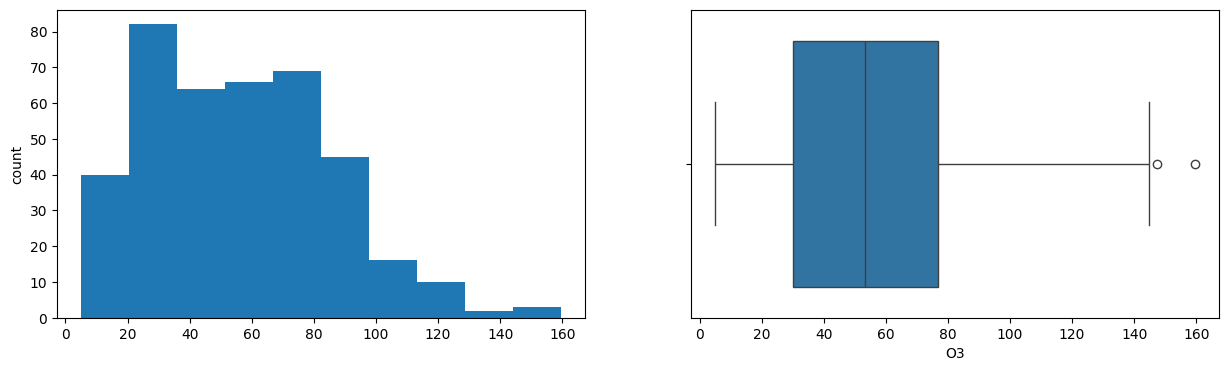

SO2
Skew : 6.87


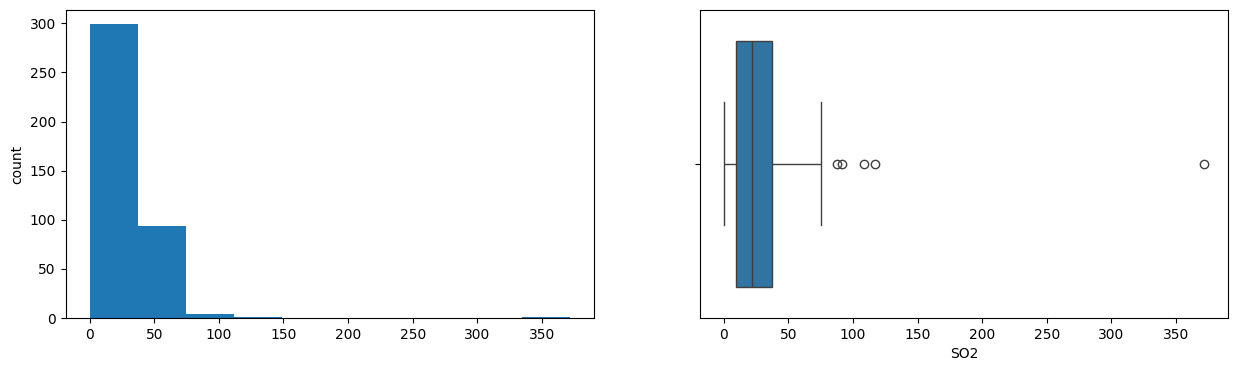

PM2.5
Skew : 1.45


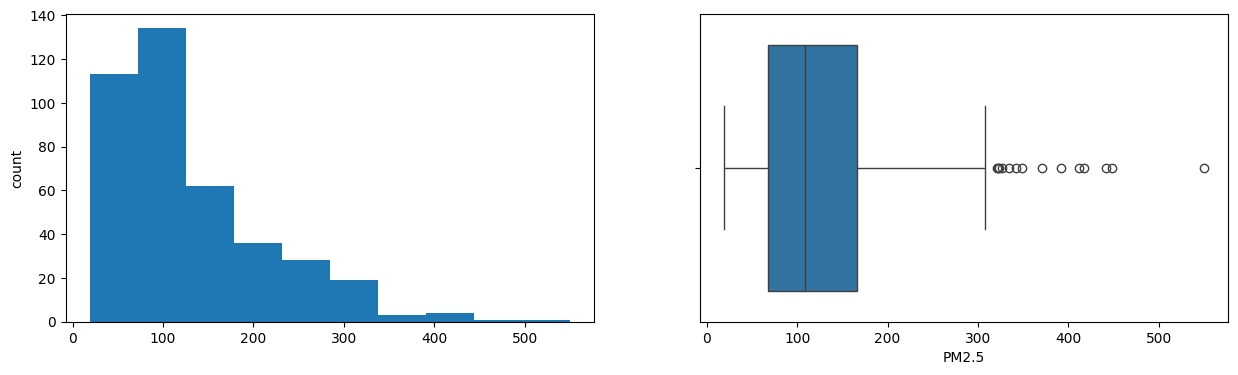

Benzene
Skew : 0.71


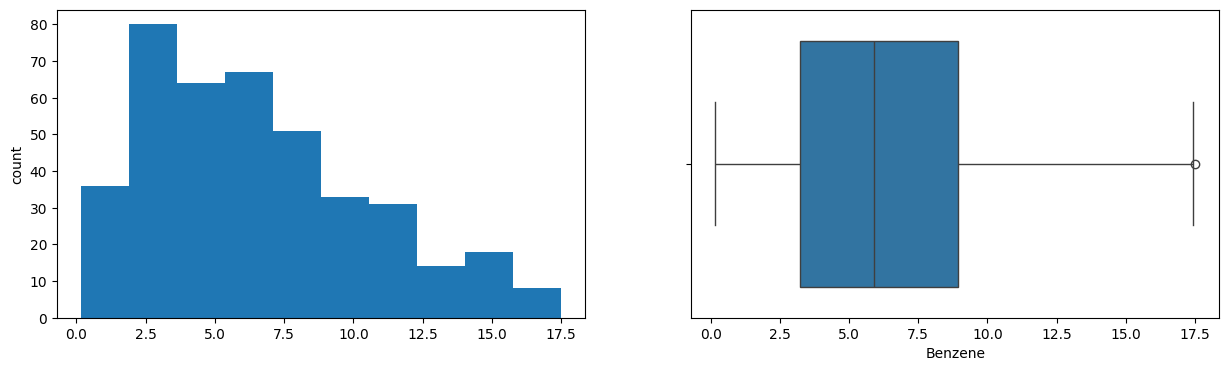

Toulene
Skew : 0.61


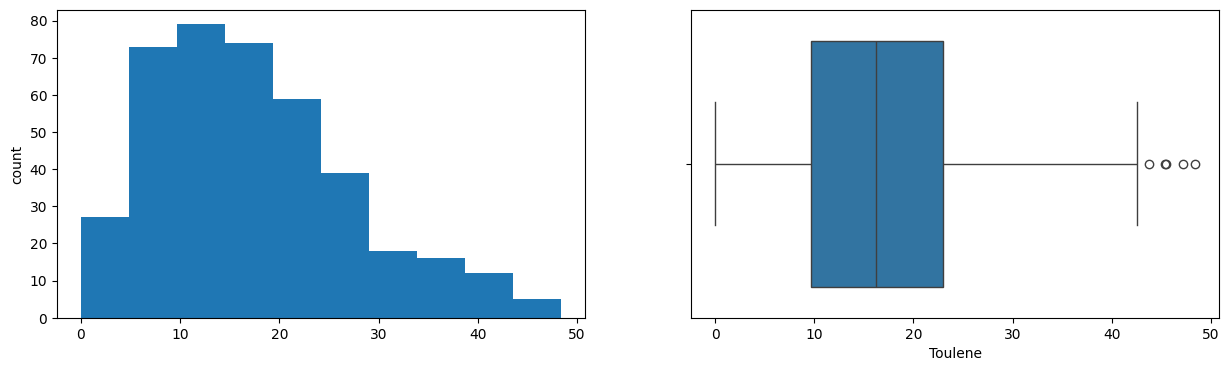

P_Xylene
Skew : 1.55


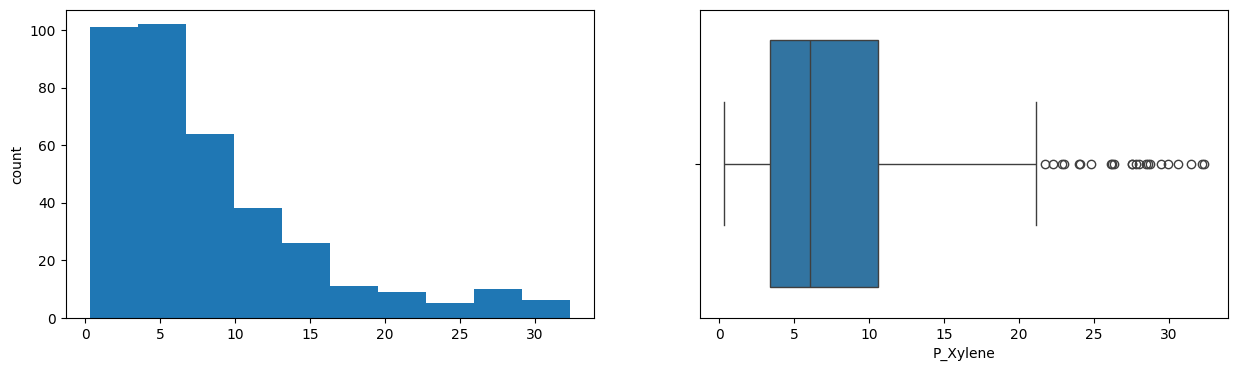

NOx
Skew : 1.32


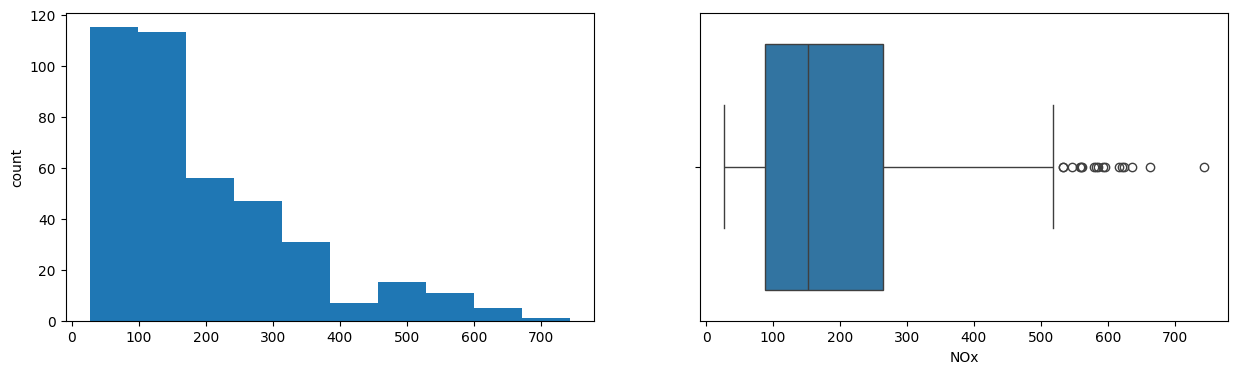

PM10
Skew : 0.61


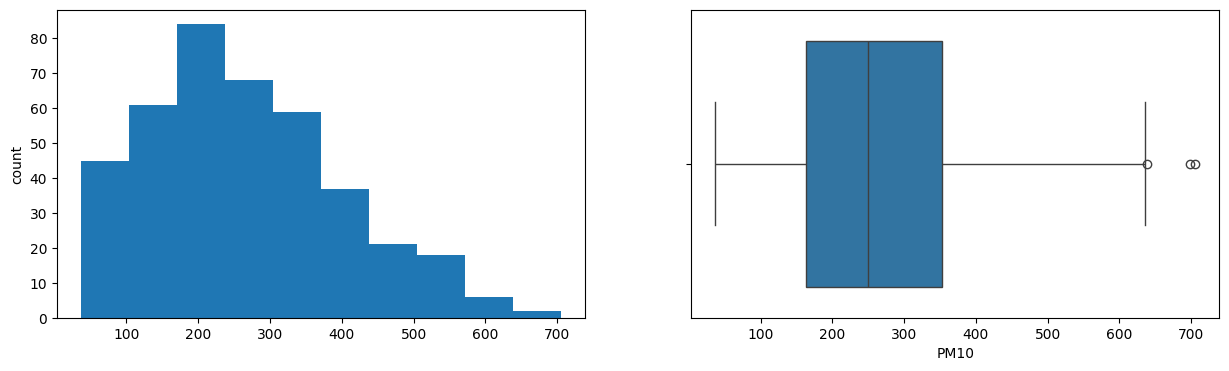

WindDirection
Skew : -0.49


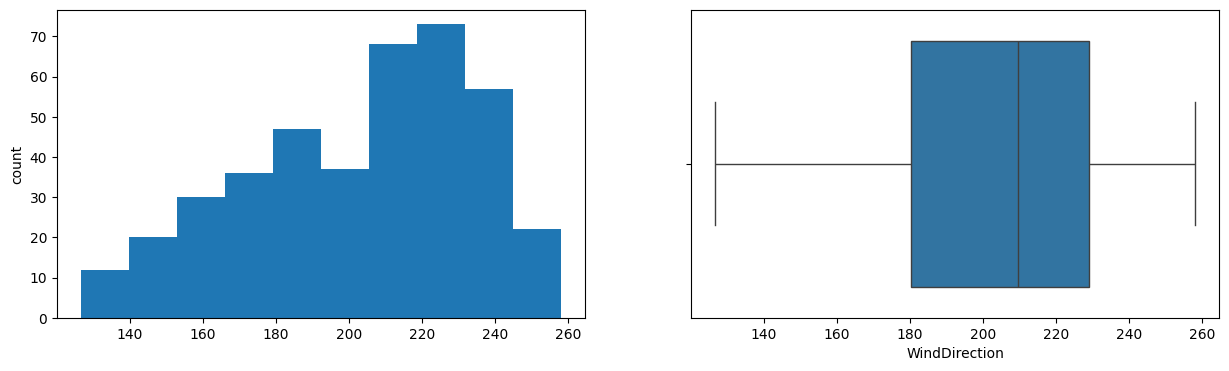

NH3
Skew : 1.34


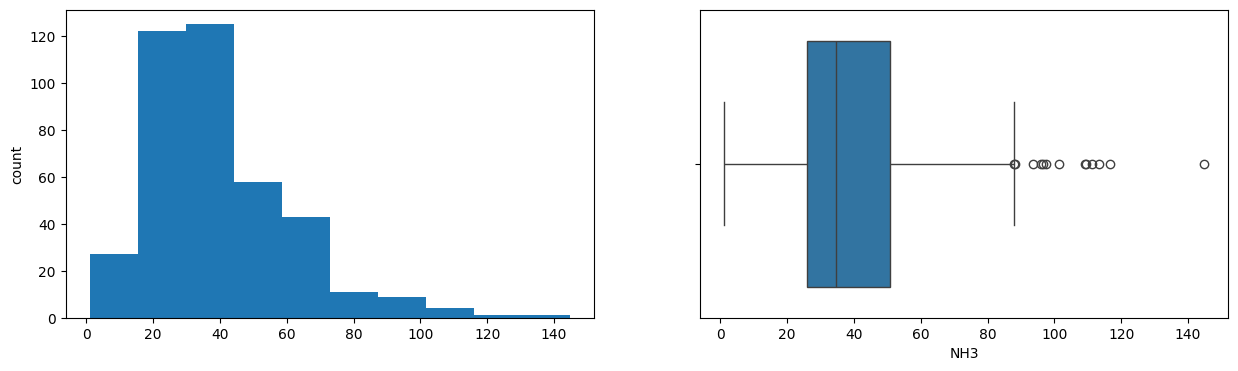

RH
Skew : -0.36


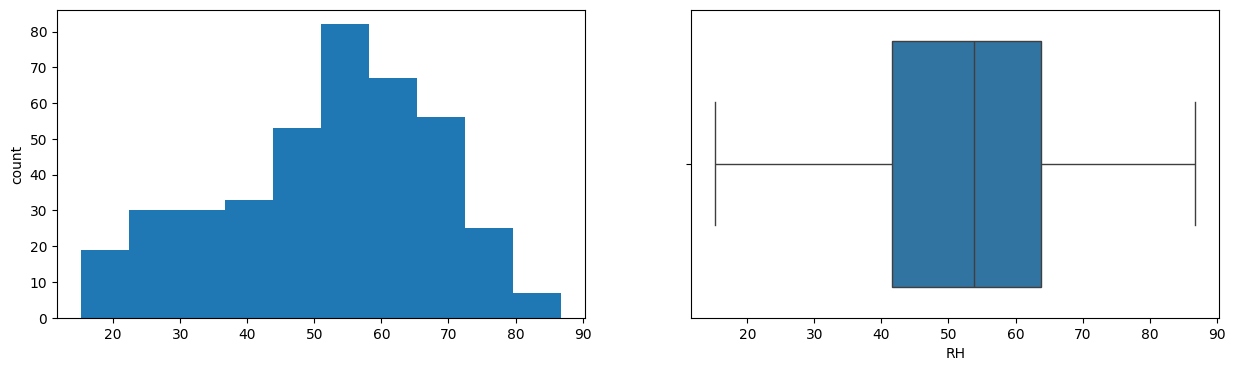

Temp
Skew : -0.57


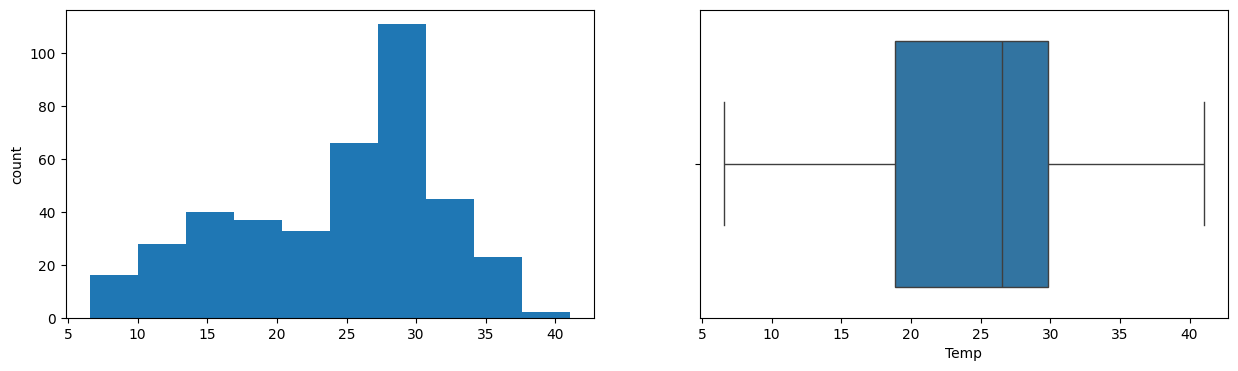

WindSpeed
Skew : 0.9


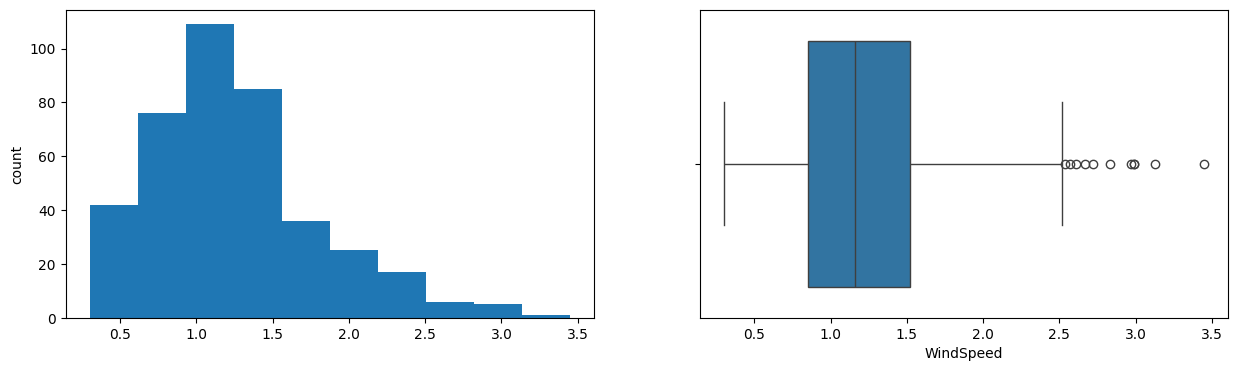

VerticalWindSpeed
Skew : 0.86


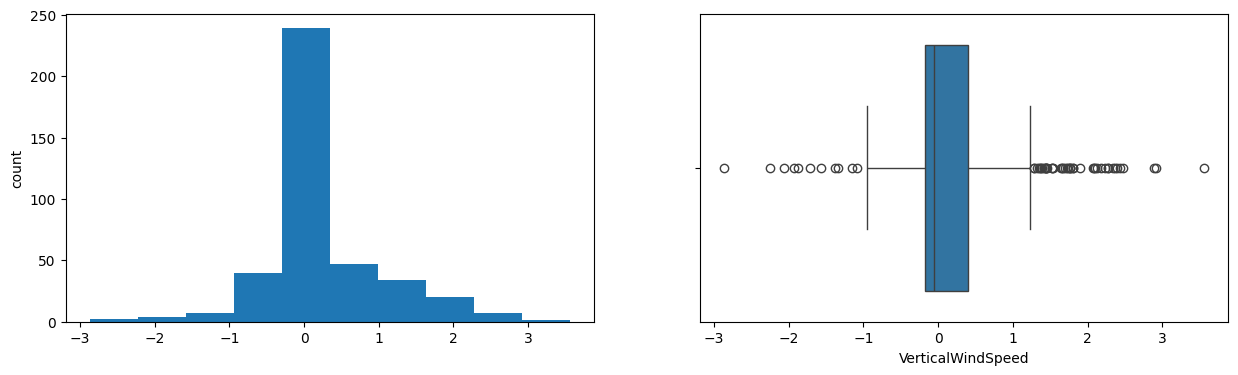

Solar
Skew : 0.15


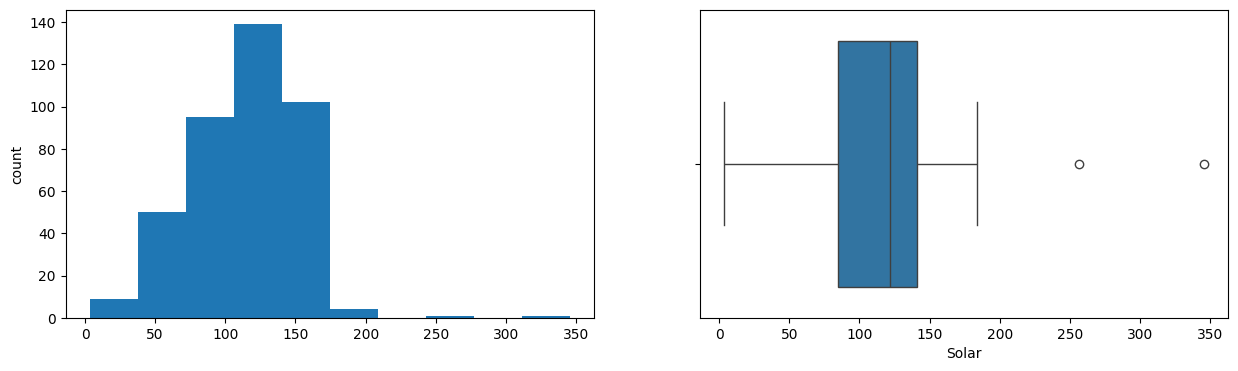

BarPressure
Skew : -1.96


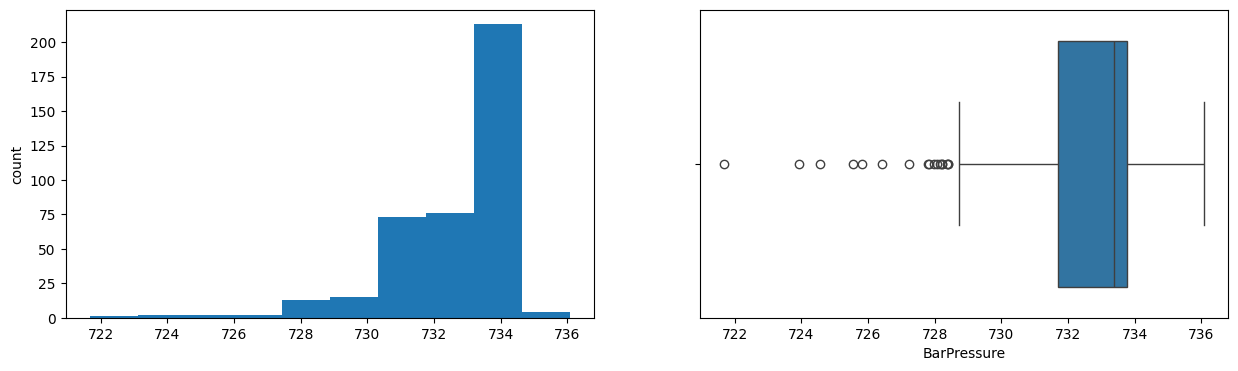

PD_PM2.5
Skew : 1.44


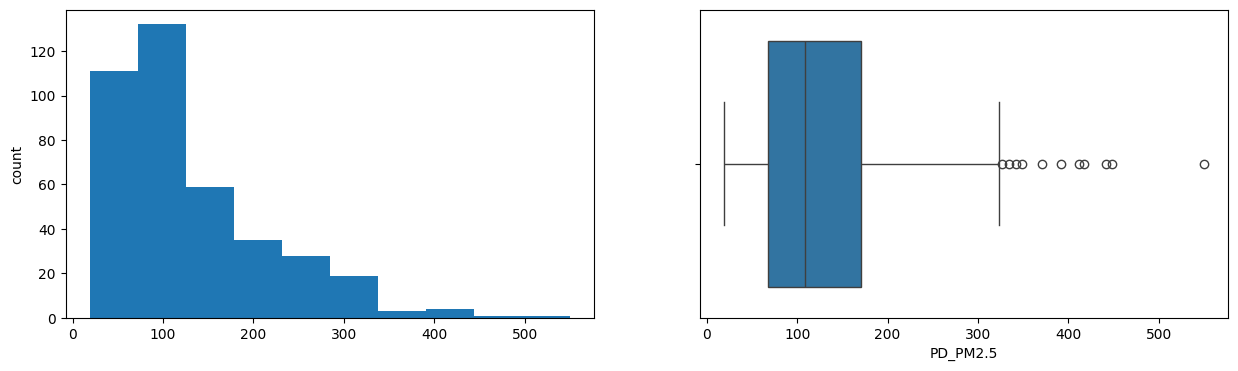

PD_PM10
Skew : 0.6


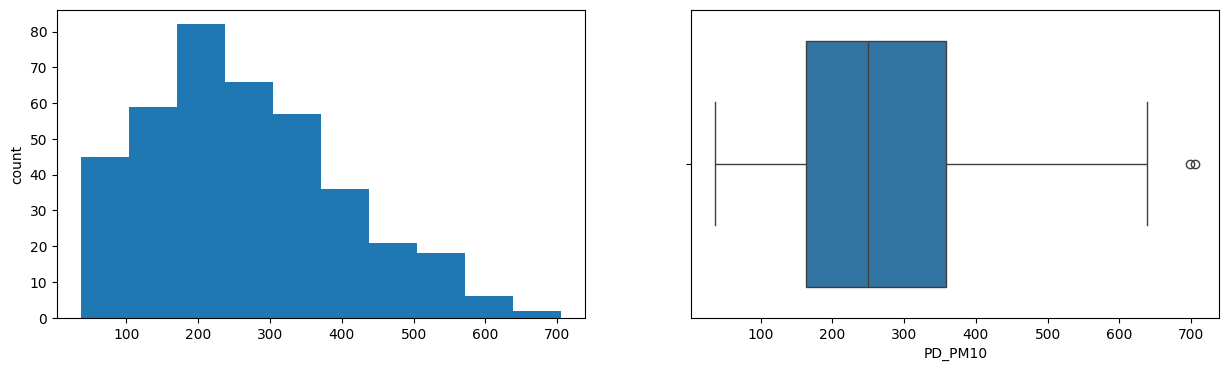

PD_NO2
Skew : 0.36


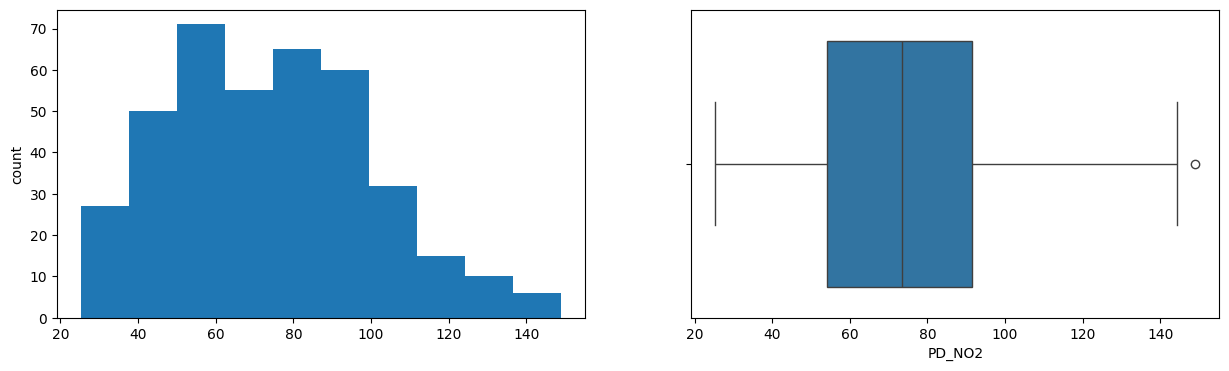

PD_SO2
Skew : 6.9


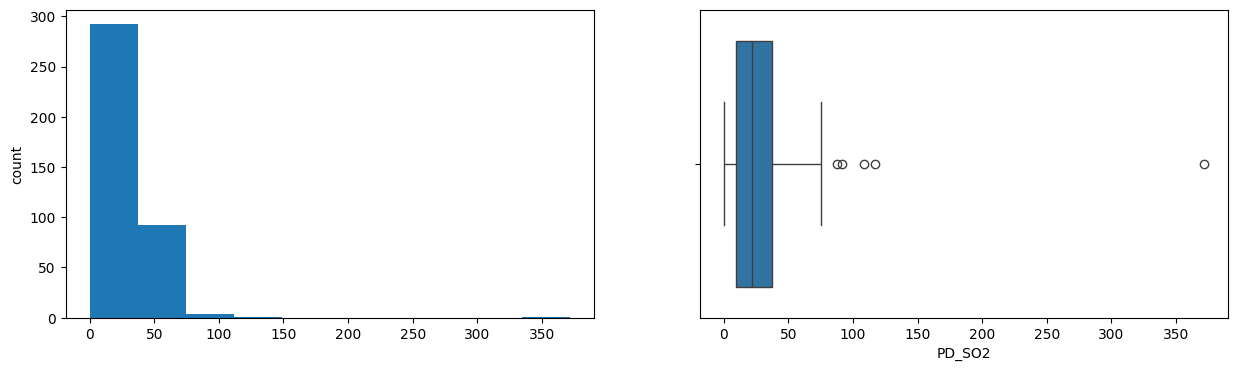

PD_CO
Skew : 4.26


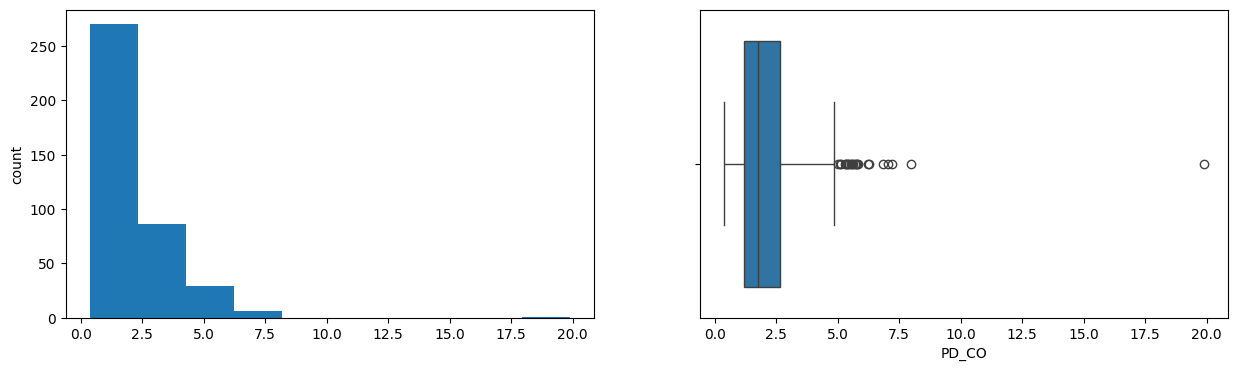

In [ ]:
for col in cont_cols:

    print(col)

    print('Skew :',round(data_air_pol[col].skew(),2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    #create histogram for numeric column, set bins
    data_air_pol[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    #create boxplot for the column
    sns.boxplot(x = data_air_pol[col])

    plt.show()

**Observations:**
- The distribution plots show that PD_CO, PD_SO2, NH3, PD_PM2.5, NOx, P_Xylene, and PM2.5 variables are highly right-skewed. It is evident from the boxplots that all these variables have outliers towards the right.
- RH, Temp, and WindDirection are the variables that are slightly left-skewed. However, their respective boxplot does not show any outliers.
- Benzene, Toulene, PM10, PD_PM10, VerticalWindSpeed, and WindSpeed seem to have a moderate right skew.

**Now, let's check the correlation among different variables**

In [ ]:
#automatically shows numeric columns and provides corelation
data_air_pol.corr()

<ipython-input-25-417df367a063>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_air_pol.corr()


,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,Temp,WindSpeed,VerticalWindSpeed,Solar,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
NO,1.000000,0.702563,0.579135,0.129863,0.362357,0.686283,0.768736,0.768918,0.859174,0.953576,...,-0.466581,-0.583108,-0.035419,-0.363409,0.314347,0.571879,0.528763,0.495680,0.462544,0.508014
CO,0.702563,1.000000,0.432257,-0.018130,0.216371,0.563486,0.659884,0.637168,0.696288,0.716067,...,-0.384185,-0.452885,-0.062395,-0.427844,0.177566,0.489927,0.417694,0.361482,0.271972,0.494046
NO2,0.579135,0.432257,1.000000,0.404555,0.320621,0.535618,0.569421,0.561429,0.512815,0.594805,...,-0.294509,-0.602798,0.155054,-0.302546,0.174705,0.440105,0.442041,0.719415,0.318353,0.322990
O3,0.129863,-0.018130,0.404555,1.000000,0.301910,0.079402,-0.033388,-0.036431,-0.064067,0.063354,...,0.115695,-0.051612,0.150399,0.281317,0.202407,0.060299,0.162493,0.341876,0.183595,-0.077699
SO2,0.362357,0.216371,0.320621,0.301910,1.000000,0.374460,0.257231,0.197489,0.266214,0.298314,...,-0.290283,-0.186606,-0.085872,-0.135900,0.369995,0.309136,0.310730,0.245794,0.708335,0.136305
PM2.5,0.686283,0.563486,0.535618,0.079402,0.374460,1.000000,0.740435,0.606057,0.682235,0.629511,...,-0.597230,-0.506733,-0.065299,-0.493472,0.361859,0.839939,0.767346,0.472739,0.503263,0.505154
Benzene,0.768736,0.659884,0.569421,-0.033388,0.257231,0.740435,1.000000,0.949327,0.918946,0.773813,...,-0.600718,-0.687999,-0.067967,-0.544657,0.373452,0.672661,0.539076,0.484999,0.266852,0.572455
Toulene,0.768918,0.637168,0.561429,-0.036431,0.197489,0.606057,0.949327,1.000000,0.949981,0.793142,...,-0.469089,-0.720340,-0.045320,-0.460368,0.303077,0.539343,0.412008,0.461626,0.244574,0.534173
P_Xylene,0.859174,0.696288,0.512815,-0.064067,0.266214,0.682235,0.918946,0.949981,1.000000,0.862045,...,-0.457376,-0.677960,0.002684,-0.463800,0.312585,0.613237,0.496517,0.414513,0.315967,0.560574
NOx,0.953576,0.716067,0.594805,0.063354,0.298314,0.629511,0.773813,0.793142,0.862045,1.000000,...,-0.427993,-0.637655,-0.071472,-0.394328,0.255496,0.507290,0.428269,0.463822,0.390195,0.501719


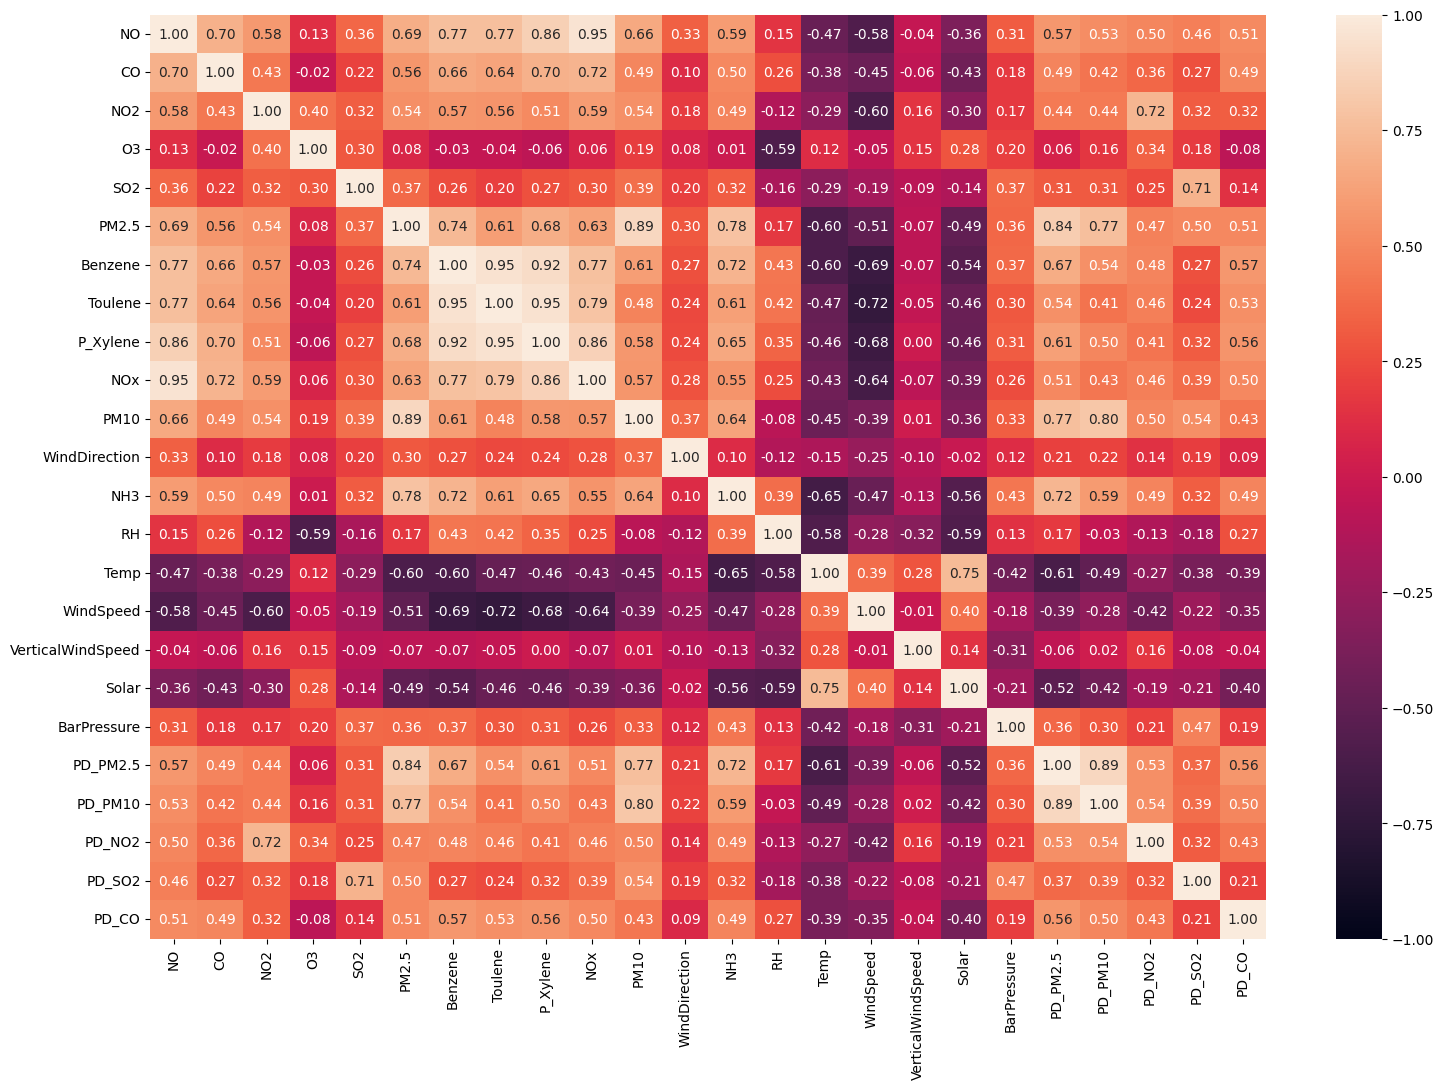

In [ ]:
plt.figure(figsize = (18,12))

sns.heatmap(data_air_pol.corr(numeric_only = True), annot = True, fmt = '0.2f', vmin=-1.0) #best practice, set min to = -1

plt.show()

**Observations:**

- We can see a **high positive correlation** among the following variables:
    1. NO2 and PD_NO2
    2. PM2.5 and PD_PM2.5
    3. PM10 and PD_PM2.5
    4. PD_PM10 and PD_PM2.5    
<br/>   
- We can see a **high negative correlation** among the following variables:
    1. Temp and NO2
    2. VerticalWindSpeed and PD_SO2
    3. VerticalWindSpeed and PD_PM2.5
    4. WindDirection and VerticalWindSpeed
    5. SO2 and WindSpeed   
<br/>  
- Nitrates and fine particulate matter 2.5 (PM2.5) are positively correlated with their previous day values, i.e., PD_NO2 and PD_PM2.5, which makes sense.
- Particle matter of 2.5 micrometers in diameter is positively correlated with the Particle matter of 10 micrometers in diameter.
- Temp and NO2 are negatively correlated which makes sense as the nitrate molecules in the air increase and the temperature decreases.
- Since The WindSpeed and VerticalWindSpeed are negatively correlated to pollutants like PD_SO2 and PD_PM2.5. This makes sense as higher wind speeds generally translate to a greater dispersion of air pollutants, resulting in lower air pollution concentrations in areas with stronger winds.

### **Data Preprocessing**

In [ ]:
data_air_pol.info()
#identify missing values in columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NO                 401 non-null    float64
 1   CO                 402 non-null    float64
 2   NO2                401 non-null    float64
 3   O3                 397 non-null    float64
 4   SO2                399 non-null    float64
 5   PM2.5              401 non-null    float64
 6   Benzene            402 non-null    float64
 7   Toulene            402 non-null    float64
 8   P_Xylene           372 non-null    float64
 9   NOx                401 non-null    float64
 10  PM10               401 non-null    float64
 11  WindDirection      402 non-null    float64
 12  NH3                401 non-null    float64
 13  RH                 402 non-null    float64
 14  Temp               401 non-null    float64
 15  WindSpeed          402 non-null    float64
 16  VerticalWindSpeed  401 non

In [ ]:
#weather is categorical
data_air_pol['Weather'].mode()

0    Summer
Name: Weather, dtype: object

In [ ]:
data_air_pol.Weather.unique()

array(['Summer', 'Monsoon', 'Autumn', 'Winter', 'Spring'], dtype=object)

In [ ]:
# Imputing missing values with mode for the Weather column and with median for all other columns as majority of variables are skewed
for col in data_air_pol.columns:

    #if column is weather, fill null values w/ mode
    if col == "Weather":
        data_air_pol[col].fillna(value = data_air_pol[col].mode()[0], inplace = True)

    #if there are other null values in other columns fill value w/ median
    else:
        data_air_pol[col].fillna(value = data_air_pol[col].median(), inplace = True)

In [ ]:
# Creating dummy variables for Weather column
# Finds values in weather, turn each value into
data_air_pol = pd.get_dummies(data_air_pol, drop_first = True)

In [ ]:
pd.get_dummies(data_air_pol, drop_first=True)

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,...,732.25,108.24,250.105,73.52,21.605,1.775,0,0,1,0
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,...,734.05,48.99,82.850,47.94,16.880,1.770,0,0,1,0
2,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,3.43,65.53,...,728.08,108.24,250.105,73.52,21.605,1.775,0,0,1,0
3,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,4.66,68.83,...,730.47,46.93,171.360,59.86,13.110,0.500,0,0,1,0
4,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,7.66,67.40,...,730.62,112.95,232.220,63.56,16.190,0.770,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,48.15,0.91,72.45,87.46,18.91,287.42,2.71,9.76,4.69,130.06,...,733.96,161.62,438.370,68.71,18.910,0.910,0,0,1,0
399,14.21,0.81,46.07,46.74,24.12,157.15,1.75,0.00,2.01,60.46,...,733.51,287.42,596.410,72.45,18.910,0.910,0,0,1,0
400,1.64,0.63,32.67,120.28,14.09,63.49,0.99,0.00,0.81,31.32,...,733.83,157.15,434.310,46.07,24.120,0.810,0,0,1,0
401,34.38,1.27,61.31,41.64,18.18,58.36,2.21,7.73,3.40,101.07,...,734.55,63.49,216.530,32.67,14.090,0.630,0,0,1,0


#### **Scaling the data**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(data_air_pol)

StandardScaler()

In [ ]:
scaler.mean_

array([8.11143424e+01, 2.20893300e+00, 7.44300496e+01, 5.62529280e+01,
       2.59457320e+01, 1.30051886e+02, 6.52441687e+00, 1.71901241e+01,
       7.96970223e+00, 1.94470943e+02, 2.65177047e+02, 2.02868201e+02,
       3.96065261e+01, 5.21512655e+01, 2.44363275e+01, 1.23784119e+00,
       1.87667494e-01, 1.12998958e+02, 7.32564764e+02, 1.29952953e+02,
       2.65198995e+02, 7.42952109e+01, 2.58243052e+01, 2.18914392e+00,
       1.53846154e-01, 1.43920596e-01, 3.47394541e-01, 1.36476427e-01])

In [ ]:
scaler.scale_ #standard deviation

array([ 96.88707528,   1.59775326,  25.76593164,  29.43382651,
        25.11956426,  83.89712321,   3.97339919,  10.38437492,
         6.48455465, 140.62647461, 134.20499672,  31.21128436,
        20.67986846,  15.83974715,   7.39364548,   0.55471277,
         0.78296948,  37.33057346,   1.79365331,  83.69290758,
       133.51768786,  25.57440403,  24.98351219,   1.57995931,
         0.36080121,   0.3510092 ,   0.47614239,   0.34329377])

In [ ]:
scaler.transform(data_air_pol)


array([[-0.76268524, -0.27471889, -1.0281037 , ..., -0.41001944,
         1.37060987, -0.39754997],
       [-0.76505914, -1.24483113, -1.13172891, ..., -0.41001944,
         1.37060987, -0.39754997],
       [-0.75876315, -1.06958505, -0.56547731, ..., -0.41001944,
         1.37060987, -0.39754997],
       ...,
       [-0.82027806, -0.9882208 , -1.62074674, ..., -0.41001944,
         1.37060987, -0.39754997],
       [-0.48235889, -0.58765832, -0.50920145, ..., -0.41001944,
         1.37060987, -0.39754997],
       [-0.5988863 , -0.70657531, -0.65513058, ..., -0.41001944,
         1.37060987, -0.39754997]])

In [ ]:
data_air_pol_scaled = scaler.fit_transform(data_air_pol)

In [ ]:
data_air_pol_scaled = pd.DataFrame(data_air_pol_scaled, columns = data_air_pol.columns)

In [ ]:
#mean and std dev of NO is now0 and 1
data_air_pol_scaled.NO.mean(), data_air_pol_scaled.NO.std(),

(0.0, 1.001243008559388)

## **Principal Component Analysis**

In [ ]:
data_air_pol_scaled.shape

(403, 28)

In [ ]:
# Defining the number of principal components to generate
# n = number of initial features = 28
n = data_air_pol_scaled.shape[1]

In [ ]:
# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
data_air_pol_pca = pd.DataFrame(pca1.fit_transform(data_air_pol_scaled))
data_air_pol_pca

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-2.742064,0.090409,-0.544034,-0.639932,1.305489,1.049067,-0.965436,0.103459,0.051540,0.198931,...,0.675502,0.804767,-0.665327,0.583680,-0.496965,0.237807,-0.311625,0.022113,-0.256680,-0.016397
1,-2.518826,1.834496,-0.820265,-0.125443,1.226361,0.136618,-0.763263,-1.243801,-0.533671,0.864223,...,0.488313,1.215222,-0.411048,0.421006,-0.146722,0.095045,-0.074077,-0.198902,-0.279627,-0.056044
2,-3.234021,-1.678367,0.109291,-0.832131,-0.425673,-0.604315,0.621228,0.278716,1.541888,0.131122,...,0.802738,0.111171,0.242053,0.430897,-0.351020,0.200112,-0.122626,-0.160006,-0.106472,0.030652
3,-2.722372,-0.876209,0.114949,-0.334952,-0.926435,-1.151151,0.121267,-0.785277,0.602173,-0.051567,...,0.372883,0.380353,0.109244,0.607604,-0.328072,0.150243,-0.260876,0.126214,-0.057704,0.025010
4,-1.952577,-1.032156,0.308900,-0.634766,-0.561540,-0.982848,0.067600,-0.769568,0.042768,0.356044,...,0.623313,-0.002952,0.282050,0.437699,-0.152451,0.206255,-0.137898,-0.130241,-0.113247,0.011455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,-0.377477,-2.833380,-1.327138,-1.307556,-2.260970,-0.918250,-0.354822,0.298462,-0.452664,-0.731200,...,-0.272777,0.609752,0.268063,0.136613,0.547656,-0.631524,-0.298067,0.183220,-0.292562,0.134019
399,-1.613237,-2.343882,-2.457767,-1.958795,-2.468323,-0.127545,0.917422,1.306465,-0.475935,-0.187057,...,0.594204,0.025188,-0.652844,-0.277841,0.377907,-0.473787,-0.019883,-0.240223,0.163084,-0.022819
400,-3.872231,-1.990180,-2.550924,-0.897667,-0.366726,1.258623,-1.306530,1.251411,-0.912761,-1.663890,...,0.773632,0.278808,-0.790530,0.362298,0.026506,-0.182100,-0.650285,-0.060376,0.103009,-0.056261
401,-2.420606,0.912599,-1.106143,-0.130414,0.414722,0.241150,-0.850811,-1.268872,-0.386708,-0.215392,...,0.782070,0.310841,-1.065966,-0.236845,0.053271,-0.206459,-0.395384,0.074167,-0.152383,-0.041282


In [ ]:
# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_
exp_var1
#first principal component explains 40% off variance, followed by 2nd PC 12%

array([0.40157886, 0.12764382, 0.07673692, 0.06749461, 0.04392657,
       0.03559814, 0.03115307, 0.02781003, 0.02365943, 0.02158212,
       0.01841877, 0.01622558, 0.01499302, 0.01363074, 0.01281323,
       0.0118397 , 0.01011448, 0.00961036, 0.00878955, 0.00583886,
       0.00510724, 0.00430188, 0.00307071, 0.0025847 , 0.00247086,
       0.00167626, 0.00082498, 0.00050549])

In [ ]:
exp_var1.cumsum()

array([0.40157886, 0.52922268, 0.6059596 , 0.67345421, 0.71738079,
       0.75297893, 0.784132  , 0.81194204, 0.83560147, 0.85718359,
       0.87560236, 0.89182795, 0.90682096, 0.9204517 , 0.93326493,
       0.94510463, 0.95521911, 0.96482947, 0.97361902, 0.97945789,
       0.98456512, 0.98886701, 0.99193771, 0.99452241, 0.99699327,
       0.99866953, 0.99949451, 1.        ])

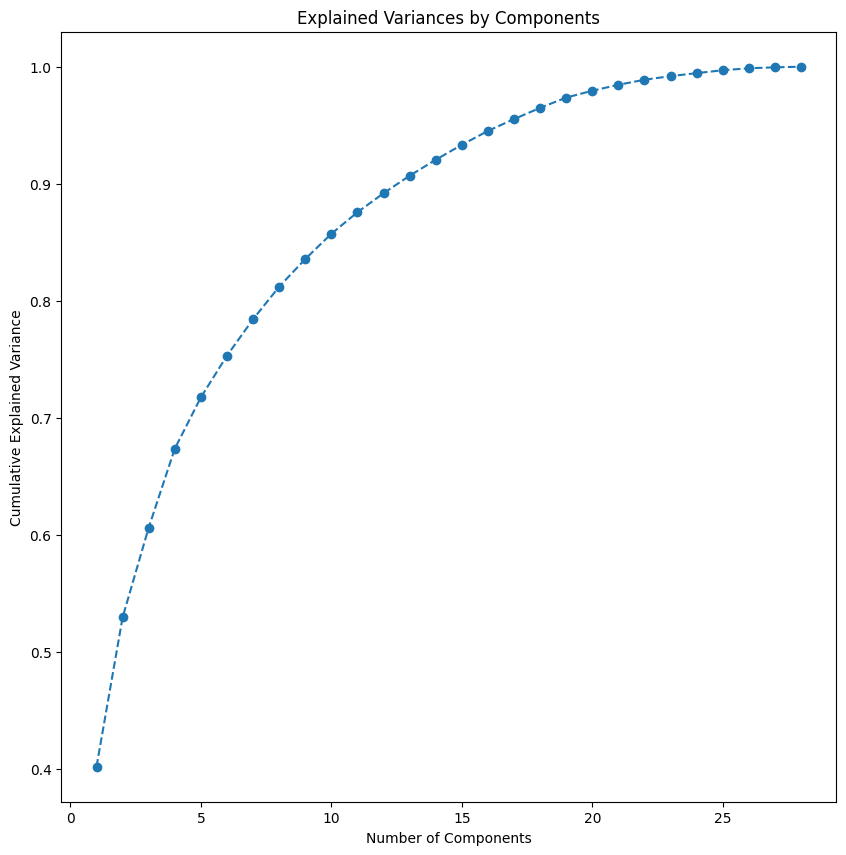

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 29), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Find the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var1):

    sum = sum + i

    if(sum>0.70):
        print("Number of PCs that explain at least 70% variance: ", ix + 1)
        break

Number of PCs that explain at least 70% variance:  5


In [ ]:
# Making a new dataframe with first 5 principal components as columns and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5], 2), index = data_air_pol_scaled.columns, columns = cols)
pc1

,PC1,PC2,PC3,PC4,PC5
NO,0.25,-0.05,0.18,0.14,-0.13
CO,0.21,0.04,0.18,-0.00,-0.03
NO2,0.19,-0.22,0.18,0.06,0.24
O3,0.02,-0.38,-0.02,0.18,0.08
SO2,0.12,-0.19,-0.20,0.28,-0.11
PM2.5,0.26,-0.06,-0.10,-0.18,-0.14
Benzene,0.27,0.09,0.15,0.01,-0.01
Toulene,0.25,0.10,0.27,0.08,0.01
P_Xylene,0.25,0.07,0.22,0.03,-0.10
NOx,0.24,0.01,0.26,0.15,-0.12


**Observations:**

- The first principal component, PC1, seems to be related to hydrocarbons like Benzene, Toluene, and Xylene that are generated due to fuel combustion.   
- The second principal component, PC2, seems to be related to humidity (RH), Ozone level, and rain, i.e., the rainy season. Whenever humidity goes down, the Ozone level goes up - more sunshine. Higher humidity is an indication of rain which has the potential to wash away atmospheric pollution.
- The third principal component, PC3, seems to be capturing air pressure - low pressure accompanies windy and rainy conditions, dispersing the pollution away. High pressure stills the wind allowing pollution to build up in urban areas.
- The fourth principal component, PC4, seems to be associated with high values of toxic gases like SO2 and is also related to the weather.
- The fifth principal component, PC5,  seems to be explaining the direction of the wind which impacts air pollution irrespective of the concentration of all pollutants. If the wind is blowing towards an urban area from an industrial area then pollution levels are likely to be higher in the town or city than if the air is blowing from another direction, for example, open farmland.

## **t-SNE**

Let's try to **visualize the data for different perplexity values**

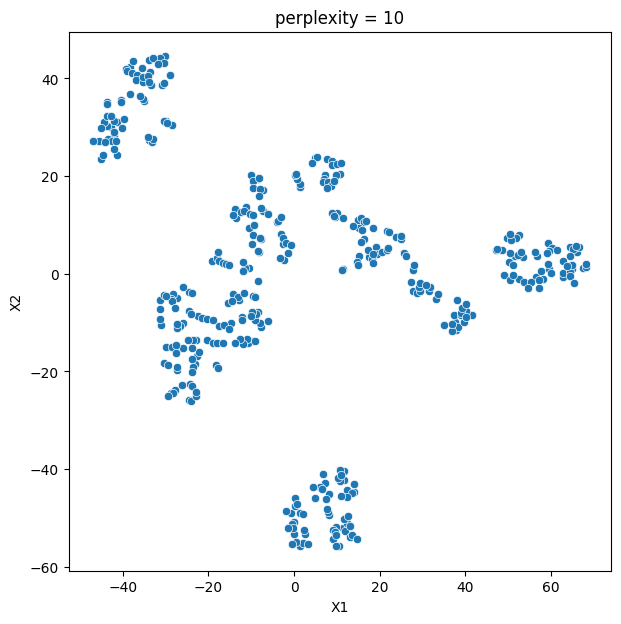

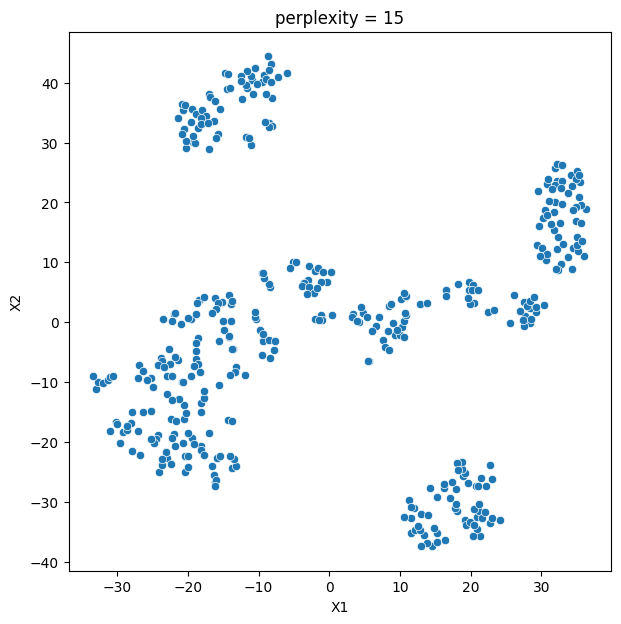

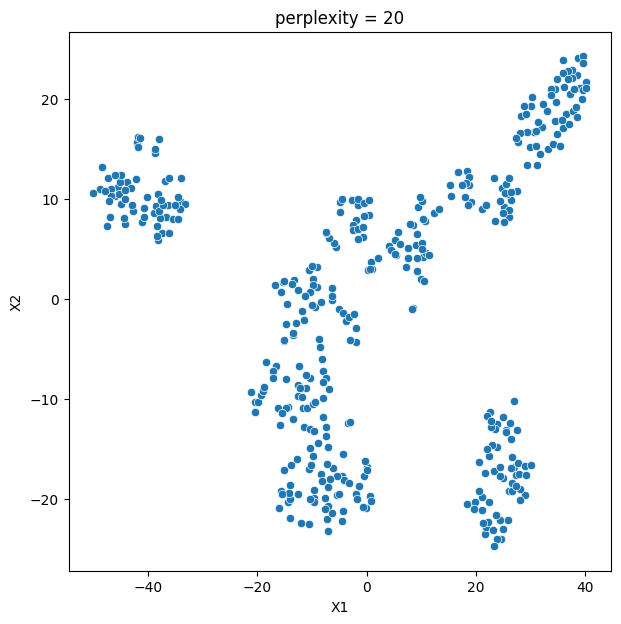

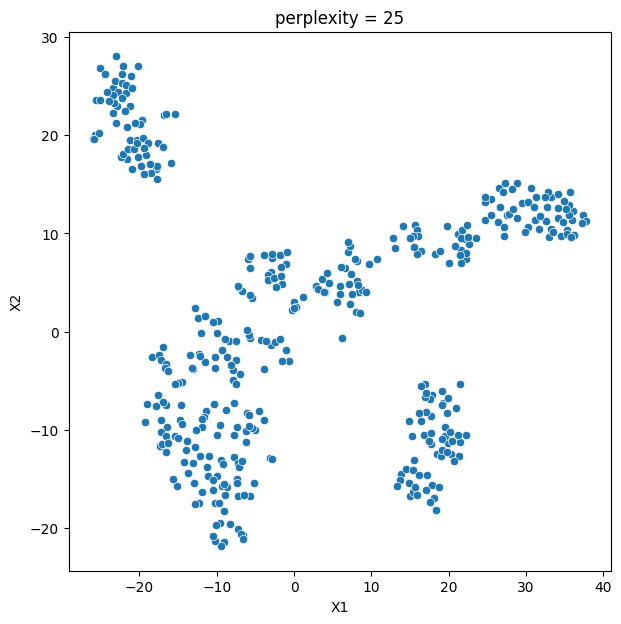

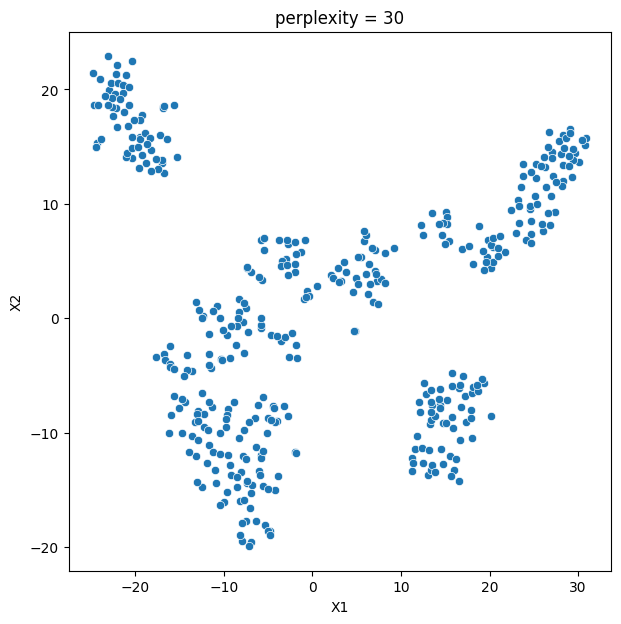

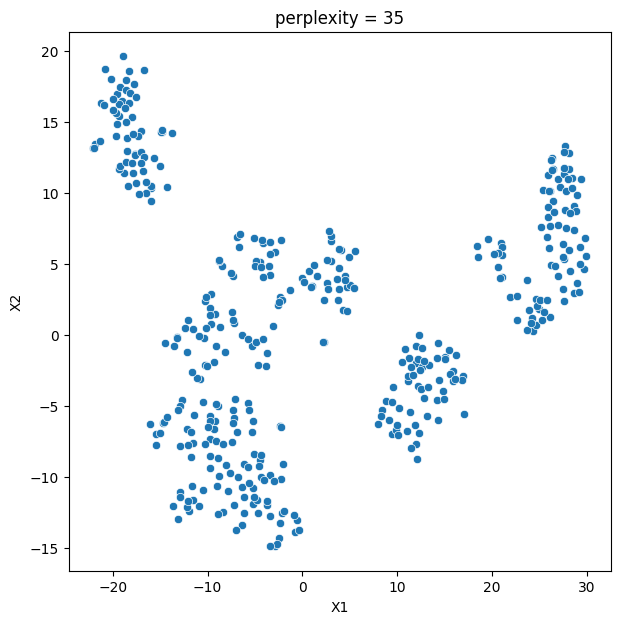

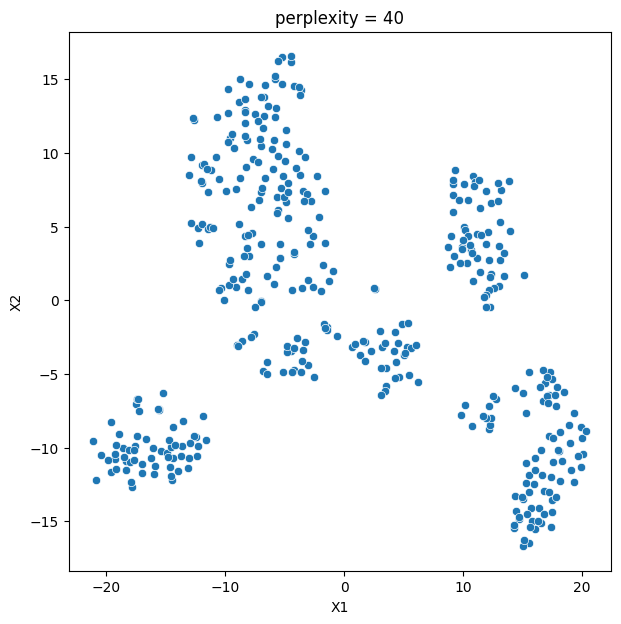

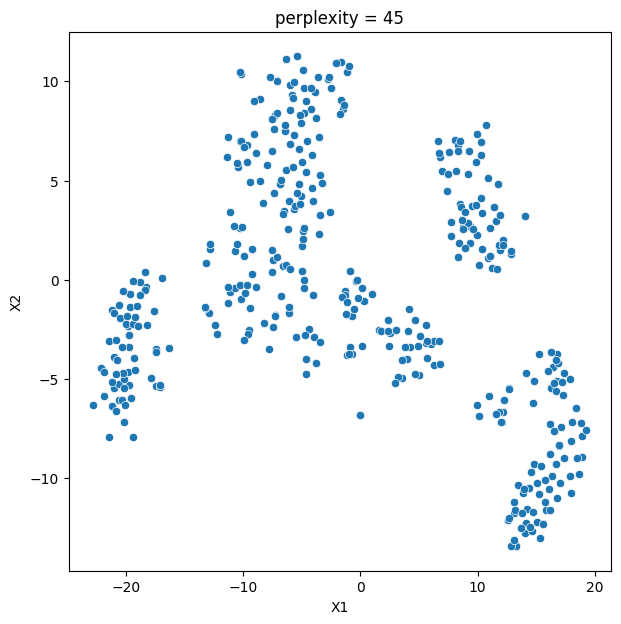

In [ ]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)

    data_air_pol_tsne = tsne.fit_transform(data_air_pol_scaled)

    data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne)

    data_air_pol_tsne.columns = ['X1', 'X2']

    plt.figure(figsize = (7,7))

    sns.scatterplot(x = 'X1', y = 'X2', data = data_air_pol_tsne)

    plt.title("perplexity = {}".format(i))

**Observations:**

- We observe that some perplexity values like 35 and 45 can capture the underlying patterns in the data better than other values.
- This shows that perplexity plays an important role in t-SNE implementation.
- Let's visualize again with **perplexity equal to 35 as 4 clear groups are distant from each other, i.e., well separated.**

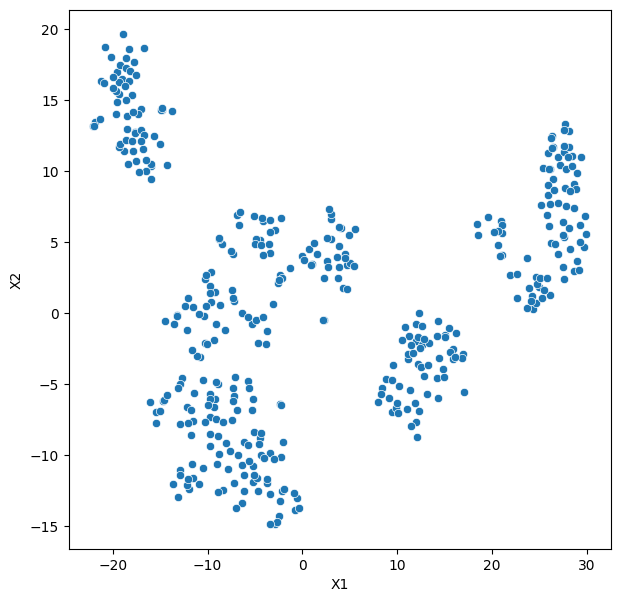

In [ ]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 35)

data_air_pol_tsne = tsne.fit_transform(data_air_pol_scaled)

# Converting the embeddings to a dataframe
data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne, columns = ["X1", "X2"])

# Scatter plot for two components
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_air_pol_tsne)

plt.show()

In [ ]:
data_air_pol_tsne

,X1,X2
0,-9.170305,1.460921
1,-9.609689,2.909789
2,-8.934766,-4.991727
3,-7.335166,-5.269650
4,-7.171617,-5.862649
...,...,...
398,-8.406491,-12.490902
399,-8.919023,-12.572359
400,-11.657774,-10.609192
401,-10.146037,2.696168


**Observations:**

- We can clearly see **4 groups in the data**.
- Let's **label these 4 groups** using the values of the X1 and X2 axes.

In [ ]:
# Let's assign points to 4 different groups
def grouping(x):
    first_component = x['X1']

    second_component = x['X2']

    if second_component > 12:
        return 'group_1'

    elif (second_component < -10) and (first_component > -10):
        return 'group_2'

    elif (second_component < 12) and (first_component > -9):
        return 'group_3'

    else:
        return 'group_4'

In [ ]:
data_air_pol_tsne['groups'] = data_air_pol_tsne.apply(grouping, axis = 1)

In [ ]:
data_air_pol_tsne

,X1,X2,groups
0,-9.170305,1.460921,group_4
1,-9.609689,2.909789,group_4
2,-8.934766,-4.991727,group_3
3,-7.335166,-5.269650,group_3
4,-7.171617,-5.862649,group_3
...,...,...,...
398,-8.406491,-12.490902,group_2
399,-8.919023,-12.572359,group_2
400,-11.657774,-10.609192,group_4
401,-10.146037,2.696168,group_4


<Axes: xlabel='X1', ylabel='X2'>

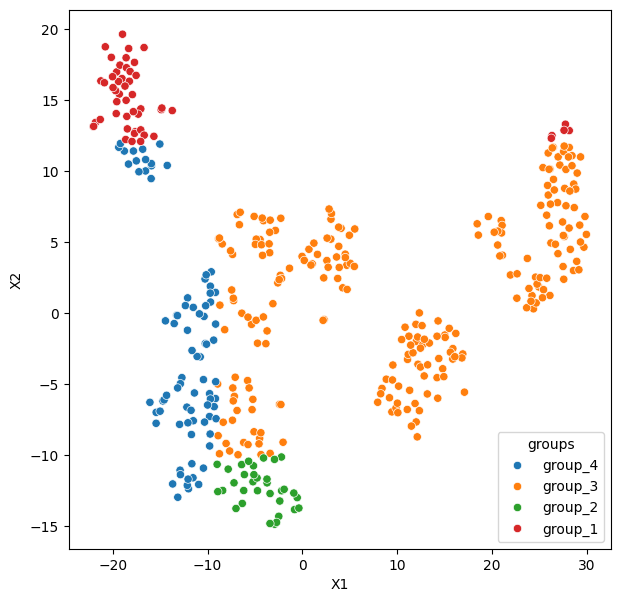

In [ ]:
# Scatter plot for two components with hue
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_air_pol_tsne, hue = 'groups')

In [ ]:
data_air_pol_tsne
#can treat "groups" as a new variable and use bivariate analysis

,X1,X2,groups
0,-9.170305,1.460921,group_4
1,-9.609689,2.909789,group_4
2,-8.934766,-4.991727,group_3
3,-7.335166,-5.269650,group_3
4,-7.171617,-5.862649,group_3
...,...,...,...
398,-8.406491,-12.490902,group_2
399,-8.919023,-12.572359,group_2
400,-11.657774,-10.609192,group_4
401,-10.146037,2.696168,group_4


In [ ]:
data_air_pol_scaled

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,-0.762685,-0.274719,-1.028104,-0.176087,-0.360903,-0.966206,-1.005290,-0.726103,-0.766391,-1.006218,...,-0.175488,-0.259436,-0.113049,-0.030312,-0.168884,-0.262123,-0.426401,-0.410019,1.37061,-0.39755
1,-0.765059,-1.244831,-1.131729,-1.256817,-0.367671,-0.832590,-0.839185,-0.586470,-0.817281,-1.018023,...,0.828051,-0.967381,-1.365729,-1.030531,-0.358008,-0.265288,-0.426401,-0.410019,1.37061,-0.39755
2,-0.758763,-1.069585,-0.565477,1.292291,-0.510985,-0.990760,-1.065691,-0.826253,-0.700079,-0.916904,...,-2.500352,-0.259436,-0.113049,-0.030312,-0.168884,-0.262123,-0.426401,-0.410019,1.37061,-0.39755
3,-0.759073,-0.900598,-0.421877,0.362069,-0.388372,-0.203844,-0.655463,-0.619211,-0.510398,-0.893437,...,-1.167876,-0.991995,-0.702821,-0.564440,-0.508908,-1.069106,-0.426401,-0.410019,1.37061,-0.39755
4,-0.751125,-1.082103,-0.482810,0.449383,-0.225551,-0.300152,-0.335838,-0.119422,-0.047760,-0.903606,...,-1.084248,-0.203159,-0.247001,-0.419764,-0.385627,-0.898215,-0.426401,-0.410019,1.37061,-0.39755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,-0.340235,-0.812975,-0.076848,1.060245,-0.280090,1.875727,-0.959988,-0.715510,-0.505771,-0.458029,...,0.777874,0.378372,1.296989,-0.218391,-0.276755,-0.809606,-0.426401,-0.410019,1.37061,-0.39755
399,-0.690539,-0.875563,-1.100680,-0.323197,-0.072682,0.322992,-1.201595,-1.655384,-0.919061,-0.952957,...,0.526989,1.881486,2.480653,-0.072151,-0.276755,-0.809606,-0.426401,-0.410019,1.37061,-0.39755
400,-0.820278,-0.988221,-1.620747,2.175289,-0.471972,-0.793375,-1.392867,-1.655384,-1.104116,-1.160172,...,0.705396,0.324962,1.266581,-1.103651,-0.068217,-0.872898,-0.426401,-0.410019,1.37061,-0.39755
401,-0.482359,-0.587658,-0.509201,-0.496467,-0.309151,-0.854521,-1.085825,-0.910996,-0.704706,-0.664178,...,1.106811,-0.794129,-0.364513,-1.627612,-0.469682,-0.986825,-0.426401,-0.410019,1.37061,-0.39755


**Now, let's try to visualize the properties of these four groups with respect to all the numeric variables in the data.**

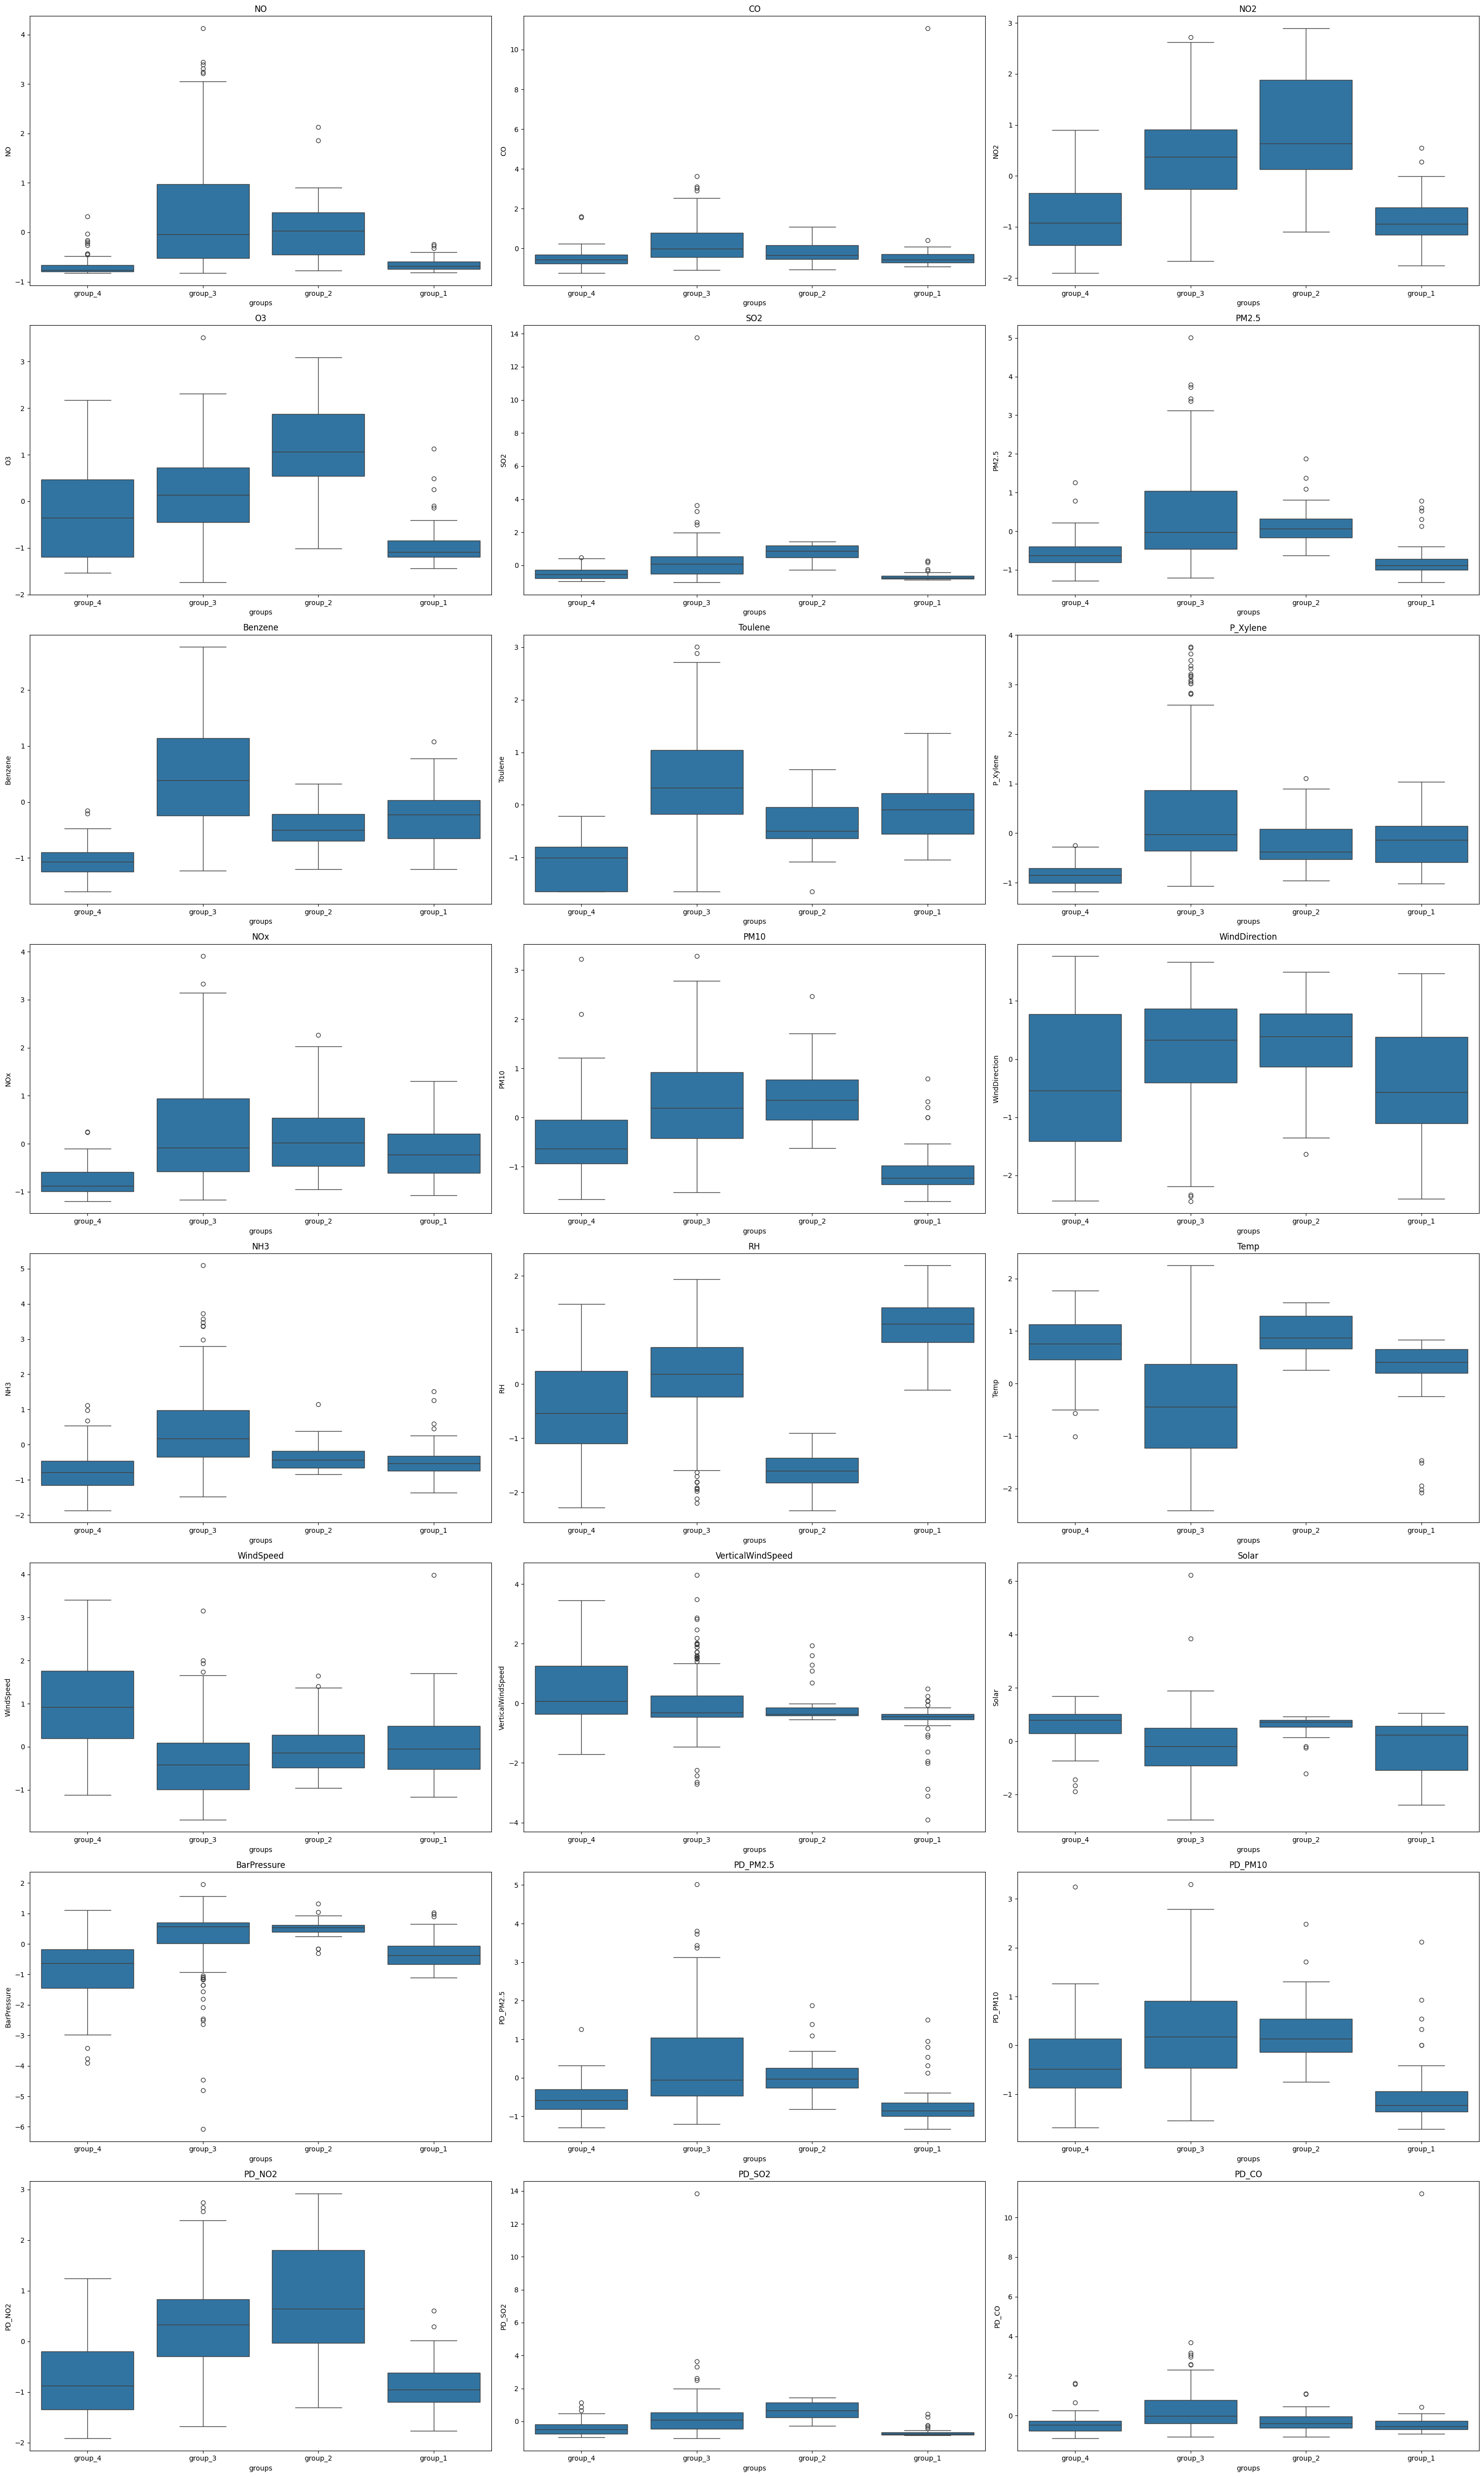

In [ ]:
all_col = data_air_pol_scaled.columns[:-4].tolist()

plt.figure(figsize = (30, 50))

#go through all columns
for i, variable in enumerate(all_col):
    plt.subplot(8, 3, i + 1)

    sns.boxplot(y=data_air_pol_scaled[variable], x=data_air_pol_tsne['groups']) #create boxplot, on y axis use original column, on x use groups

    plt.tight_layout()

    plt.title(variable)

plt.show()

**Observations:**
- There are four groups in the data. Each group has a different set of characteristics.

- **Group 1 represents hot and humid areas**. As there is less variability in the pressure, the wind speed is low. Higher humidity is an indication of rain which has the potential to wash away atmospheric pollution, resulting in low levels of pollutants - fine particulate matter and hydrocarbons.

- Group 2 represents areas with medium humidity and temperature with low pressure and wind speed. The level of pollutants is medium. These might be **developing urban areas** where the Ozone (O3) concentration is medium to high, resulting in comparatively higher solar radiation.

- Group 3 is the largest and represents low-humidity and high-temperature areas. As the variability in pressure is high, the wind speed is high. If the wind is blowing towards an urban area from an industrial area then pollution levels are likely to be higher in the town or city than if the air is blowing from another direction, for example, open farmland. These might be **developed urban areas** as they have the highest level of Ozone pollutant and solar radiation, which could be a result of pollutants emitted by cars, power plants, etc.

- Group 4 represents **industrial areas** as it has a very high concentration of hydrocarbons, which are generally a result of fuel combustion. These areas have a high level of fine particulate matter and other pollutants. As there is less variability in air pressure, the wind speed is low.